In [2]:
import plotly.io as pio
pio.renderers.default = "notebook"
from collections import defaultdict
import collections

In [3]:
import pandas as pd

deaths_all_github = pd.read_csv('deatheverestall_himalayandatabasesubset_github.csv')
deaths_kaggle = pd.read_csv('mount_everest_deaths_kaggle.csv')
ascent_opennepaldata = pd.read_csv('mountaineeringfacts2018_opennepaldata.csv')
ascent_kaggle = pd.read_csv("Mt_Everest_Ascent_Data_kaggle.csv")

In [4]:
##Feedback
#how many people actually did the ascent should also be shown to give an idea of how many people died. So total numbers of climbers that year should be shown?
#ascnet/descnet/route prep in ["deathclsnt"] column
#"msmtbid" tells about the summit bid being successful or not
#find month also?

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

First step should be aggregate all the death info, see how much is common and how much is different. Then combine the summit info. 

In [6]:
#open nepal data doesn't tell if these were successful summits or not though
# yasuko died, but is in both ascent datasets, need to cross check the names in the death datasets

In [7]:
#direction_on_route=[]
#for i in deaths_all_github["deathclsnt"]:
#    if re.findall[r"asc"]
#    i = re.sub("Route preparation")
death_dir = collections.Counter(deaths_all_github["deathclsnt"])
print(death_dir)

Counter({'Route preparation': 121, 'Descending from summit bid': 113, 'Death at BC': 34, 'Ascending in summit bid': 24, 'Expedition evacuation': 12, 'Death enroute BC': 6})


In [8]:
deaths_all_github.head()

,fname,lname,name,citizen,village,sex,age,yob,dthmdy,deathtime,...,peakabvbc,peaksmts,allexps,allabvbc,allsmts,highexps,highabvbc,highsmts,maxhighpt,maxpeakid
0,Alexander Mitchell,Kellas,Alexander Mitchell Kellas,UK,NaN,M,52,1868.0,5-Jun-21,NaN,...,0,0,6,4,2,1,0,0,6965,LNPO
1,NaN,Unknown,Unknown,India,NaN,M,0,NaN,30-Jun-21,NaN,...,0,0,4,4,0,4,4,0,6300,KANG
2,Dorje,Sherpa,Dorje Sherpa,Nepal,NaN,M,0,NaN,7-Jun-22,13:30,...,0,0,0,0,0,0,0,0,0,NaN
3,Lhakpa,Sherpa,Lhakpa Sherpa,Nepal,NaN,M,0,NaN,7-Jun-22,13:30,...,0,0,0,0,0,0,0,0,0,NaN
4,Norbu,Sherpa,Norbu Sherpa,Nepal,NaN,M,0,NaN,7-Jun-22,13:30,...,0,0,0,0,0,0,0,0,0,NaN


In [9]:
set(list(deaths_all_github["route1"]))

{'Khumbutse-W Ridge-N Face (Hornbein Couloir)',
 'Lho La-W Ridge',
 'Lho La-W Ridge (to 7800m)',
 'Lho La-W Ridge up; N Face (Hornbein)-W Ridge down',
 'N Col',
 'N Col (recon to 6800m)',
 'N Col (training, recon)',
 'N Col up, Hornbein Couloir down',
 'N Col-Great Couloir-N Ridge (to 8250m)',
 'N Col-N Face',
 'N Col-N Ridge-N Face',
 'N Col-N Ridge-N Face up; Great Couloir down',
 'N Col-NE Ridge',
 'N Col-NE Ridge (Mallory to 8450m+)',
 'N Col-NE Ridge (to 8550m)',
 'N Col-NE Ridge (training)',
 'N Col-NE Ridge (up); Great Couloir (down)',
 'N Face (Great Couloir)',
 'N Face (Hornbein Couloir)',
 'N Face (Japanese & Hornbein Couloirs)',
 'N Rib-W Ridge',
 'NE Ridge',
 'NE Ridge (to 7700m)',
 'S Col (recon)',
 'S Col (skiing)',
 'S Col-SE Ridge',
 'S Pillar',
 'S Pillar up; SE Ridge-S Col down',
 'S Pillar-SE Ridge',
 'SW Face',
 'SW Face (Bonington rte)',
 'SW Face (to 8380m)',
 'SW Face (to 8450m)',
 'SW Face up; SE Ridge-S Col down',
 'SW Face-S Smt',
 'W Cwm-W Ridge',
 'W Cwm-W R

In [10]:
deaths_all_subset= deaths_all_github[["dthmdy","deathnote"]]
deaths_all_subset_clean = deaths_all_subset.dropna()
print(len(deaths_all_subset_clean["dthmdy"]), len(deaths_all_subset_clean["deathnote"]))

310 310


let's try to find deaths based on the routes first. If there is 1-2 death at some routes, maybe they don't need to be visualised

In [11]:
pattern = r"\d+"
#although len of deaths_all_subset and deaths_all_subset_clean is the same, better to choose the clean one anyway for future
# Filter rows where 'deathnote' contains any digits
#filtered_df = deaths_all_github[deaths_all_github["deathnote"].str.contains(pattern, regex=True, na=False)]
filtered_df = deaths_all_github[deaths_all_github["deathnote"].str.contains(pattern, regex=True, na=False)]


# Display the filtered DataFrame
print(filtered_df)


                  fname    lname                               name  \
0    Alexander Mitchell   Kellas          Alexander Mitchell Kellas   
1                   NaN  Unknown                            Unknown   
2                 Dorje   Sherpa                       Dorje Sherpa   
3                Lhakpa   Sherpa                      Lhakpa Sherpa   
4                 Norbu   Sherpa                       Norbu Sherpa   
..                  ...      ...                                ...   
305     Christopher Jon   Kulish             Christopher Jon Kulish   
306               Puwei      Liu                          Puwei Liu   
307        Abdul Waheed  Waraich               Abdul Waheed Waraich   
308         Pemba Tashi   Sherpa       Pemba Tashi Sherpa (Yaphu-6)   
309         Wang Dorchi   Sherpa  Wang Dorchi Sherpa (Makalu-Barun)   

         citizen          village sex  age     yob     dthmdy deathtime  ...  \
0             UK              NaN   M   52  1868.0   5-Jun-21      

In [12]:
years_of_death = []
for i in filtered_df["dthmdy"]:
    digit = re.findall(r'(\d{2,})',i)
    if len(digit)>1:
        if int(digit[1])>24:
            year="19"+digit[1]
        else:
            year="20"+digit[1]
    else:
        if len(digit[0])>2:
            year = digit[0]
        else:
            if int(digit[0])>24:
                year="19"+digit[0]
            else:
                year="20"+digit[0]
    years_of_death.append(year)
    print(digit, year)

['21'] 2021
['30', '21'] 2021
['22'] 2022
['22'] 2022
['22'] 2022
['22'] 2022
['22'] 2022
['22'] 2022
['22'] 2022
['13', '24'] 2024
['25', '24'] 2024
['24'] 2024
['24'] 2024
['34'] 1934
['31', '52'] 1952
['1960'] 1960
['27', '62'] 1962
['23', '63'] 1963
['1964'] 1964
['1966'] 1966
['18', '69'] 1969
['70'] 1970
['70'] 1970
['70'] 1970
['70'] 1970
['70'] 1970
['70'] 1970
['70'] 1970
['21', '70'] 1970
['18', '71'] 1971
['16', '72'] 1972
['12', '73'] 1973
['74'] 1974
['74'] 1974
['74'] 1974
['74'] 1974
['74'] 1974
['74'] 1974
['75'] 1975
['23', '75'] 1975
['26', '75'] 1975
['10', '76'] 1976
['1978'] 1978
['18', '78'] 1978
['16', '79'] 1979
['79'] 1979
['79'] 1979
['12', '79'] 1979
['12', '79'] 1979
['12', '79'] 1979
['80'] 1980
['80'] 1980
['22', '80'] 1980
['12', '80'] 1980
['15', '82'] 1982
['17', '82'] 1982
['17', '82'] 1982
['31', '82'] 1982
['31', '82'] 1982
['31', '82'] 1982
['82'] 1982
['27', '82'] 1982
['14', '82'] 1982
['28', '82'] 1982
['28', '82'] 1982
['83'] 1983
['83'] 1983
['

In [13]:
print(len(years_of_death))

307


since we have reference to the book, maybe we can cross check the expected graphs and other things? (The himalaya by numbers)

In [14]:
deaths_all_github.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       309 non-null    object 
 1   lname       306 non-null    object 
 2   name        310 non-null    object 
 3   citizen     310 non-null    object 
 4   village     80 non-null     object 
 5   sex         310 non-null    object 
 6   age         310 non-null    int64  
 7   yob         224 non-null    float64
 8   dthmdy      310 non-null    object 
 9   deathtime   166 non-null    object 
 10  ddthtime    310 non-null    float64
 11  dthmondd    304 non-null    object 
 12  deathdate   310 non-null    object 
 13  deathnote   310 non-null    object 
 14  deathclsnt  310 non-null    object 
 15  deathtype   310 non-null    int64  
 16  deathhgtm   310 non-null    int64  
 17  deathclass  310 non-null    int64  
 18  ams         310 non-null    int64  
 19  weather     310 non-null    i

which parameters do we not want?

for github death dataset:\
village: an entry will tell if the person was Tibetan? \
age,\
dthmdy, (death in month, day, year format) \
deathtime, (time of death) \
"ddthtime",: day and time of death \
"dthmondd": month and time of death \
"deathdate": date of death \
"deathnote": comments on death \
"deathclsnt": description of how the climber died \
"deathtype": categorization of death--fall, avalanche, etc. \
"deathhgtm": death height in meters \
"weather": weather \
"mseason": season of ascent \
"yearseas": season and year \
"hired": 1 if hired \
"sherpa": 1 if sherpa \
"tibetan": 1 \
"deathrte": death route \
"route1": route 1 \

potentials: \
citizen \
"o2used": if oxygen was used, 1 "o2none": if oxygen was not used \

unclear: \
"deathclass": class of death \


route
S Col-SE Ridge - 1
N Face (Japanese & Hornbein Couloirs) - 2
N Col-NE Ridge (Mallory to 8450m+) - 2


In [15]:
deaths_all_github.isnull().sum()

fname           1
lname           4
name            0
citizen         0
village       230
sex             0
age             0
yob            86
dthmdy          0
deathtime     144
ddthtime        0
dthmondd        6
deathdate       0
deathnote       0
deathclsnt      0
deathtype       0
deathhgtm       0
deathclass      0
ams             0
weather         0
msuccess        0
o2used          0
o2none          0
myear           0
mseason         0
yearseas        0
msmtbid         7
msmtterm        7
expldr          0
hired           0
sherpa          0
tibetan         0
expid           0
membid          0
peakid          0
host            0
deathrte        0
route1         39
route2        310
agency        310
agntid        310
peakexps        0
peakabvbc       0
peaksmts        0
allexps         0
allabvbc        0
allsmts         0
highexps        0
highabvbc       0
highsmts        0
maxhighpt       0
maxpeakid     204
dtype: int64

## based on the book, there are primarily two routes: S Col-SE Ridge and S Col-SE Ridge and N Col-NE Ridge

In [16]:
death_route = set(list(deaths_all_github["deathrte"]))
print(death_route)

{0, 1, 2}


In [17]:
deaths_all_github["weather"].describe() #wtf does 0 and 1 mean in the weather?

count    310.000000
mean       0.070968
std        0.257186
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: weather, dtype: float64

In [18]:
subset = deaths_all_github[["deathrte","hired"]] #get subset

subset.corr()

,deathrte,hired
deathrte,1.000000,-0.141847
hired,-0.141847,1.000000


In [19]:
death_meta1 = deaths_all_github[["deathclsnt","deathtype", "deathclass", "deathnote"]]
death_meta1.head()

,deathclsnt,deathtype,deathclass,deathnote
0,Death enroute BC,10,1,Illness (non-AMS) (5700m)(e)
1,Death enroute BC,10,1,Illness (non-AMS) (4300m)(e)
2,Route preparation,7,3,Avalanche (6800m)
3,Route preparation,7,3,Avalanche (6800m)
4,Route preparation,7,3,Avalanche (6800m)


In [37]:
death_heights=[]
for i in  filtered_df["deathnote"]:
    dh = re.findall("\(\d+m?\)", i)
    if len(dh)!=0:
        digit= re.findall(r'\d+',dh[0])
        #print(digit[0], type(digit[0]))
        death_heights.append(int(digit[0]))
        #death_heights.append(int())

In [22]:
from collections import defaultdict
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Load route data
file_path = "20241128073524-40121-data.txt"
data = pd.read_csv(file_path, delimiter="\t")

# Extract latitudes, longitudes, and elevations
latitudes = data['latitude']
longitudes = data['longitude']
elevations = data['altitude (m)']

# Step 1: Count deaths by year and height
death_counts_dict = defaultdict(lambda: defaultdict(int))
for height, year in zip(death_heights, years_of_death):
    death_counts_dict[year][height] += 1

# Flatten the death data for plotting
years = []
heights = []
counts = []
for year, height_data in death_counts_dict.items():
    for height, count in height_data.items():
        years.append(year)
        heights.append(height)
        counts.append(count)

# Map death heights to closest latitude and longitude in the route data
def find_closest_coords(elevations, latitudes, longitudes, height):
    idx = (np.abs(elevations - height)).idxmin()
    return latitudes[idx], longitudes[idx]

death_coords = [find_closest_coords(elevations, latitudes, longitudes, height) for height in heights]
death_latitudes = [coord[0] for coord in death_coords]
death_longitudes = [coord[1] for coord in death_coords]

# Prepare blob data for Plotly
blob_data = pd.DataFrame({
    "Year": years,
    "Latitude": death_latitudes,
    "Longitude": death_longitudes,
    "Elevation (m)": heights,
    "Deaths": counts
})

# Create a route trace
route_trace = go.Scatter3d(
    x=latitudes,
    y=longitudes,
    z=elevations,
    mode='lines',
    line=dict(color='blue', width=4),
    name='Route'
)

# Create a scatter plot for deaths
death_trace = go.Scatter3d(
    x=blob_data["Latitude"],
    y=blob_data["Longitude"],
    z=blob_data["Elevation (m)"],
    mode='markers',
    marker=dict(
        size=blob_data["Deaths"] * 5,  # Scale size of blobs by number of deaths
        #color=blob_data["Deaths"],  # Color by number of deaths
        colorscale='Reds',
        opacity=1.0
    ),
    name='Deaths'
)

# Combine traces into a single figure
fig = go.Figure(data=[route_trace, death_trace])

# Update layout with background color
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Latitude', backgroundcolor='lightblue'),
        yaxis=dict(title='Longitude', backgroundcolor='lightblue'),
        zaxis=dict(title='Elevation (m)', backgroundcolor='lightblue')
    ),
    title='Interactive 3D Everest South Col Route (Approx.) with Cumulative Deaths',
    paper_bgcolor='lightgray',  # Background color outside the plot
    plot_bgcolor='white'  # Background color inside the plot
)

# Show the interactive plot
fig.show()

# Save the plot as an HTML file
html_file_path = "everest_route_with_deaths_3d_visible.html"
fig.write_html(html_file_path)

print(f"Plot saved as {html_file_path}")


Plot saved as everest_route_with_deaths_3d_visible.html


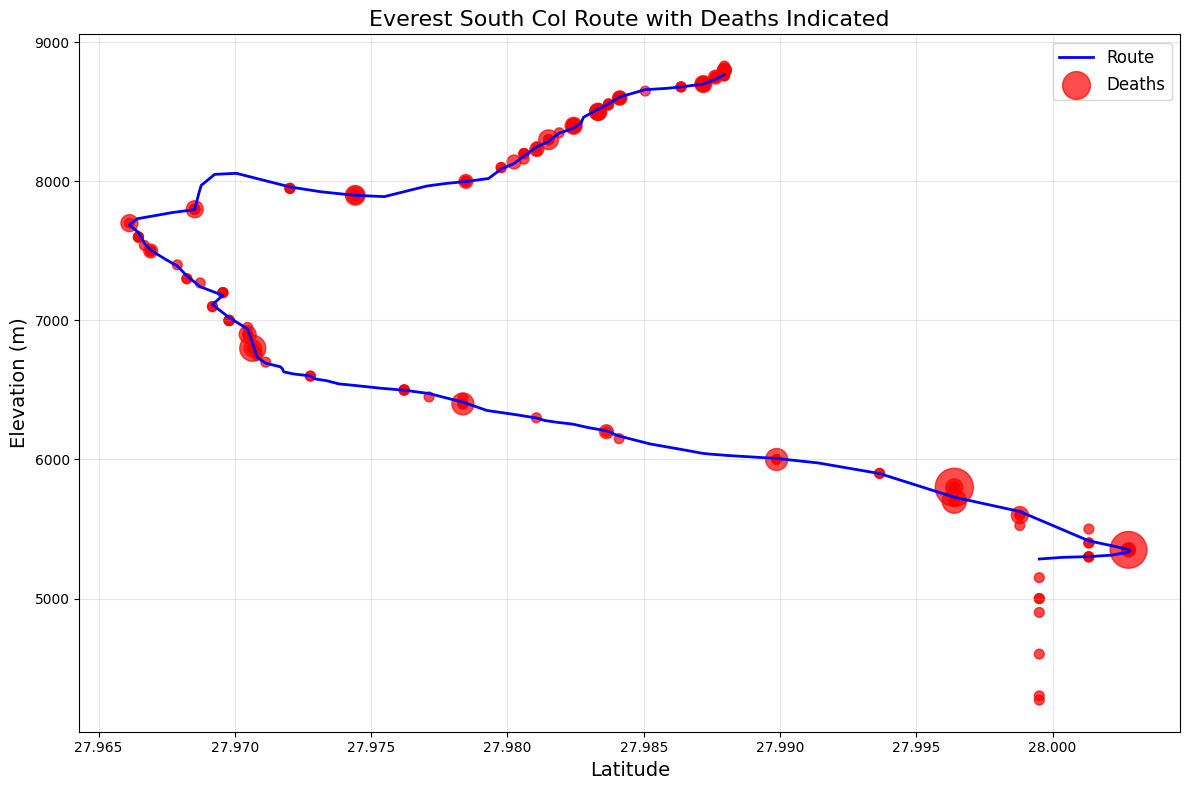

In [23]:
from collections import defaultdict

#cumulative graph of deaths

# Load route data
file_path = "20241128073524-40121-data.txt"
data = pd.read_csv(file_path, delimiter="\t")

# Extract latitudes and elevations
latitudes = data['latitude']
longittude = data['longitude']
elevations = data['altitude (m)']


# Step 1: Count deaths by year and height
death_counts_dict = defaultdict(lambda: defaultdict(int))
for height, year in zip(death_heights, years_of_death):
    death_counts_dict[year][height] += 1

# Flatten the death data for plotting
years = []
heights = []
counts = []
for year, height_data in death_counts_dict.items():
    for height, count in height_data.items():
        years.append(year)
        heights.append(height)
        counts.append(count)

# Map death heights to closest latitude in the route data
def find_closest_latitude(elevations, latitudes, height):
    idx = (np.abs(elevations - height)).idxmin()
    return latitudes[idx]

death_latitudes = [find_closest_latitude(elevations, latitudes, height) for height in heights]

# Prepare data for plotting blobs
blob_data = pd.DataFrame({
    "Year": years,
    "Latitude": death_latitudes,
    "Elevation (m)": heights,
    "Deaths": counts
})

# Plot the route
plt.figure(figsize=(12, 8))
plt.plot(latitudes, elevations, color="blue", linewidth=2, label="Route")

# Overlay blobs indicating deaths
plt.scatter(
    blob_data["Latitude"],
    blob_data["Elevation (m)"],
    s=blob_data["Deaths"] * 50,  # Scale size of blobs by number of deaths
    color="red",
    alpha=0.7,
    label="Deaths"
)

# Customize the plot
plt.title("Everest South Col Route with Deaths Indicated", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Save the plot
output_path = "everest_south_col_proute_with_deaths_corrected.png"
#plt.savefig(output_path)
plt.show()

#output_path


In [24]:
import plotly.io as pio
pio.renderers.default = "notebook"


In [26]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from collections import defaultdict

# Route annotations
annotations = {
    "Base Camp": {"Meters": 5364.23},
    "Camp 1": {"Meters": 5996.46},
    "Camp 2": {"Meters": 6400.80},
    "Camp 3": {"Meters": 7207.74},
    "Camp 4": {"Meters": 7966.15},
    "Summit": {"Meters": 8848.86},  # Highest point
    "Death Zone": {"Meters Range": [7620.00, 8848.86]}  # From 7620 m to the highest point
}

'''# Simulated route data
latitudes = np.linspace(27.9, 28.0, 100)  # Simulated latitudes for the route
elevations = np.linspace(5364, 8848, 100)  # Simulated elevations for the route

# Simulated death data
death_heights = [6400, 7300, 6150, 5000, 8200, 5900, 7950, 6800, 7700, 7300, 6150, 8200]
years_of_death = [2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004, 2000, 2001, 2002]
'''
# Count deaths by year and height
death_counts_dict = defaultdict(lambda: defaultdict(int))
for height, year in zip(death_heights, years_of_death):
    death_counts_dict[year][height] += 1

# Flatten the death data for plotting
years = []
heights = []
counts = []
for year, height_data in death_counts_dict.items():
    for height, count in height_data.items():
        years.append(year)
        heights.append(height)
        counts.append(count)

# Map death heights to closest latitude in the route data
def find_closest_latitude(elevations, latitudes, height):
    idx = (np.abs(elevations - height)).argmin()
    return latitudes[idx]

death_latitudes = [find_closest_latitude(elevations, latitudes, height) for height in heights]

# Prepare data for plotting blobs
blob_data = pd.DataFrame({
    "Year": years,
    "Latitude": death_latitudes,
    "Elevation (m)": heights,
    "Deaths": counts
})

# Prepare annotations for camps
camp_annotations = []
for camp, info in annotations.items():
    if camp != "Death Zone":
        latitude = find_closest_latitude(elevations, latitudes, info["Meters"])
        camp_annotations.append({"Camp": camp, "Latitude": latitude, "Elevation (m)": info["Meters"]})

# Create the plotly figure
fig = go.Figure()

# Add the route (blue line)
fig.add_trace(go.Scatter(
    x=latitudes,
    y=elevations,
    mode="lines",
    name="Route",
    line=dict(color="blue", width=2)
))

# Add death blobs
fig.add_trace(go.Scatter(
    x=blob_data["Latitude"],
    y=blob_data["Elevation (m)"],
    mode="markers",
    marker=dict(
        size=blob_data["Deaths"] * 5,  # Scale marker size by number of deaths
        color="red",
        opacity=0.7,
        line=dict(width=1, color="white")
    ),
    name="Deaths",
    text=[f"Year: {year}<br>Deaths: {count}" for year, count in zip(blob_data["Year"], blob_data["Deaths"])],
    hoverinfo="text"
))

# Add markers for camps
for camp in camp_annotations:
    fig.add_trace(
        go.Scatter(
            x=[camp["Latitude"]],
            y=[camp["Elevation (m)"]],
            mode="markers+text",
            name=camp["Camp"],
            marker=dict(size=12, color="green"),
            text=camp["Camp"],
            textposition="top center"
        )
    )

# Add the death zone as a shaded area
fig.add_trace(
    go.Scatter(
        x=[latitudes.min(), latitudes.max()],
        y=[annotations["Death Zone"]["Meters Range"][0]] * 2,
        mode="lines",
        name="Death Zone Start",
        line=dict(color="red", dash="dash")
    )
)
fig.add_trace(
    go.Scatter(
        x=[latitudes.min(), latitudes.max()],
        y=[annotations["Death Zone"]["Meters Range"][1]] * 2,
        mode="lines",
        name="Death Zone End",
        line=dict(color="red", dash="dash")
    )
)

# Customize layout
fig.update_layout(
    title="Everest Route with Deaths and Annotations",
    xaxis_title="Latitude",
    yaxis_title="Elevation (m)",
    font=dict(size=14),
    title_font_size=20,
    showlegend=True,
    template="plotly_white"
)

# Show the interactive plot
fig.show()
#fig.write_html("statsic_everest_route_with_annotations_and_deaths.html")

In [29]:
'''import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from collections import defaultdict

# Load route data
file_path = "20241128073524-40121-data.txt"
data = pd.read_csv(file_path, delimiter="\t")

# Extract latitudes and elevations
latitudes = data['latitude']
elevations = data['altitude (m)']

# Example inputs: `death_heights` and `years_of_death`
death_heights = [6400, 7300, 6150, 5000, 8200, 5900, 7950, 6800, 7700, 7300, 6150, 8200]
years_of_death = [2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004, 2000, 2001, 2002]
'''
# Camps and zones data
annotations = {
    "Base Camp": {"Meters": 5364.23},
    "Camp 1": {"Meters": 5996.46},
    "Camp 2": {"Meters": 6400.80},
    "Camp 3": {"Meters": 7207.74},
    "Camp 4": {"Meters": 7966.15},
    "Summit": {"Meters": 8848.86},  # Highest point
    "Death Zone": {"Meters Range": [7620.00, 8848.86]}  # From 7620 m to the highest point
}

# Map death heights to the closest latitude
def find_closest_latitude(elevations, latitudes, height):
    idx = (np.abs(elevations - height)).idxmin()
    return latitudes[idx]

death_latitudes = [find_closest_latitude(elevations, latitudes, h) for h in death_heights]

# Step 1: Prepare cumulative deaths
# Dictionary to store cumulative deaths at each (latitude, elevation) over time
cumulative_deaths = defaultdict(int)

# Prepare a list to hold cumulative data for animation
animated_data = []

for year in sorted(set(years_of_death)):
    for height, lat, death_year in zip(death_heights, death_latitudes, years_of_death):
        if death_year <= year:
            cumulative_deaths[(lat, height)] += 1

    # Add cumulative data for this year to the animated dataset
    for (lat, height), count in cumulative_deaths.items():
        animated_data.append({"Year": year, "Latitude": lat, "Elevation (m)": height, "Deaths": count})

# Convert to a DataFrame for Plotly
df_animated = pd.DataFrame(animated_data)

# Prepare annotations for camps
camp_annotations = []
for camp, info in annotations.items():
    if camp != "Death Zone":
        latitude = find_closest_latitude(elevations, latitudes, info["Meters"])
        camp_annotations.append({"Camp": camp, "Latitude": latitude, "Elevation (m)": info["Meters"]})

# Step 2: Create the animated plot
fig = px.scatter(
    df_animated,
    x="Latitude",
    y="Elevation (m)",
    size=df_animated["Deaths"] * 10 + 10,  # Make blobs bigger and scale based on deaths
    color_discrete_sequence=["red"],  # Set all blobs to red
    animation_frame="Year",
    #template="ggplot2",
    title="Cumulative Deaths on South Col Route Over Time",
    labels={"Latitude": "Latitude", "Elevation (m)": "Elevation (m)"},
    template="plotly_white"
)

# Add static route line to the plot
fig.add_trace(
    go.Scatter(
        x=latitudes,
        y=elevations,
        mode="lines",
        name="Route",
        line=dict(color="blue", width=2)
    )
)

# Add markers for camps
for camp in camp_annotations:
    fig.add_trace(
        go.Scatter(
            x=[camp["Latitude"]],
            y=[camp["Elevation (m)"]],
            mode="markers+text",
            name=camp["Camp"],
            marker=dict(size=12, color="green"),
            text=camp["Camp"],
            textposition="top center"
        )
    )

# Add the death zone as a shaded area
fig.add_trace(
    go.Scatter(
        x=[latitudes.min(), latitudes.max()],
        y=[annotations["Death Zone"]["Meters Range"][0]] * 2,
        mode="lines",
        name="Death Zone Start",
        line=dict(color="red", dash="dash")
    )
)
fig.add_trace(
    go.Scatter(
        x=[latitudes.min(), latitudes.max()],
        y=[annotations["Death Zone"]["Meters Range"][1]] * 2,
        mode="lines",
        name="Death Zone End",
        line=dict(color="red", dash="dash")
    )
)

# Customize layout
fig.update_layout(
    xaxis_title="Latitude",
    yaxis_title="Elevation (m)",
    font=dict(size=14),
    title_font_size=20,
    showlegend=True
)

# Display the interactive plot
fig.show()

# Save the plot as an HTML file
#fig.write_html("everest_route_with_annotations.html")
#print("Plot saved as everest_route_with_annotations.html")


In [30]:
len(death_heights)

307

In [31]:
import re

death_heights = []
non_matching_rows = []  # To store rows that don't match the pattern

for index, i in enumerate(deaths_all_github["deathnote"]):
    dh = re.findall(r"\(\d+m?\)", i)
    if len(dh) != 0:
        digit = re.findall(r"\d+", dh[0])
        if digit:  # Check if any digits were extracted
            death_heights.append(int(digit[0]))
    else:
        # Record rows that don't match the pattern
        non_matching_rows.append((index, i))

# Display rows that did not match
if non_matching_rows:
    print("Non-matching rows:")
    for row in non_matching_rows:
        print(f"Index: {row[0]}, Value: {row[1]}")

print(f"Number of non-matching rows: {len(non_matching_rows)}")


Non-matching rows:
Index: 122, Value: Other (e)
Index: 137, Value: Avalanche (e)
Index: 264, Value: Other
Number of non-matching rows: 3


In [32]:
#deaths_all_subset_clean
pattern = r"\d+"

# Filter rows where 'deathnote' contains any digits
filtered_df = deaths_all_subset_clean[deaths_all_subset_clean["deathnote"].str.contains(pattern, regex=True, na=False)]

# Display the filtered DataFrame
print(len(filtered_df))


307


In [33]:
print(len(death_heights))

307


In [34]:
death_count = collections.Counter(years_of_death)
print(death_count)

Counter({'2014': 16, '1996': 15, '2015': 14, '1982': 11, '2006': 11, '2019': 11, '1988': 10, '2012': 10, '1984': 9, '1997': 9, '1970': 8, '1989': 8, '2013': 8, '2022': 7, '1985': 7, '1992': 7, '1993': 7, '2004': 7, '2007': 7, '2021': 6, '1974': 6, '1979': 6, '2005': 6, '2017': 6, '1986': 5, '1994': 5, '2001': 5, '2009': 5, '2016': 5, '2018': 5, '2024': 4, '1980': 4, '1990': 4, '1998': 4, '1999': 4, '2003': 4, '2011': 4, '1975': 3, '1983': 3, '1987': 3, '1995': 3, '2002': 3, '2010': 3, '1978': 2, '1991': 2, '2000': 2, '1934': 1, '1952': 1, '1960': 1, '1962': 1, '1963': 1, '1964': 1, '1966': 1, '1969': 1, '1971': 1, '1972': 1, '1973': 1, '1976': 1, '2008': 1})


In [35]:
from collections import defaultdict

# Example input lists
heights = death_heights  # Heights at which people died
years =  years_of_death # Years in which they died

# Step 1: Create a dictionary to group heights by year
year_to_heights = defaultdict(list)
for h, y in zip(heights, years):
    year_to_heights[y].append(h)

# Step 2: Prepare the output lists
unique_years = sorted(year_to_heights.keys())
associated_heights = [year_to_heights[year] for year in unique_years]
death_counts = [len(year_to_heights[year]) for year in unique_years]

# Output lists
print("Years:", unique_years)
print("Heights Associated:", associated_heights)
print("Death Counts:", death_counts)


Years: ['1934', '1952', '1960', '1962', '1963', '1964', '1966', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1978', '1979', '1980', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2021', '2022', '2024']
Heights Associated: [[6500], [6950], [6400], [6700], [5800], [7000], [7540], [5800], [5700, 5700, 5700, 5700, 5700, 5700, 5525, 6150], [6800], [5900], [6900], [6400, 6400, 6400, 5800, 6400, 6400], [8100, 5000, 8800], [6600], [5700, 5800], [7600, 8000, 8350, 6800, 6800, 6800], [8300, 5700, 6400, 6800], [7950, 8230, 8230, 5600, 5600, 5600, 5800, 6770, 8300, 8800, 8800], [8800, 8600, 8800], [5600, 4900, 6500, 8600, 8140, 8140, 7900, 8400, 8400], [7500, 6900, 8500, 7900, 7950, 7900, 7900], [7000, 7500, 5700, 6600, 7500